# 2019.11.24. 딥-러닝 과정 CNN

# 두번째 실습. Keras 모델 생성/학습 - MNIST : CNN
[Keras Dataset](https://keras.io/ko/datasets/#mnist)

## 1. 데이터 불러오기


In [20]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                   test_size=0.2, 
                                                   random_state=123)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)
(10000, 28, 28) (10000,)


## 2. 이미지 데이터 확인하기 🖼


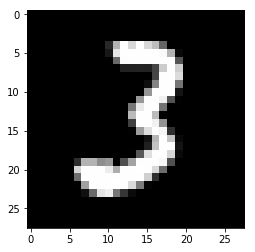

In [22]:
import matplotlib.pyplot as plt

image = X_train[9]

plt.imshow(image, cmap=plt.cm.gray)

## 3-1. 이미지 데이터 전처리 : 2차원 -> 3차원 🌟🌟🌟


In [23]:
w = h = 28
X_train = X_train.reshape((X_train.shape[0], w, h, 1))
X_val = X_val.reshape((X_val.shape[0], w, h, 1))
X_test = X_test.reshape((X_test.shape[0], w, h, 1))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(10000, 28, 28, 1)


## 3-2. 이미지 데이터 전처리 : Normalzation 


In [24]:
print(X_train[9])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 41]
  [178]


In [25]:
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

print(X_train[9])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

## 4. Label 전처리 (one-hot encoding) 


In [26]:
print(y_train[:10])

[3 2 0 1 9 8 2 7 2 3]


In [27]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train[:10])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## 5. 모델 생성 : CNN 🌟🌟🌟


In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten

model = Sequential()
model.add(Conv2D(filters=32, 
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu', 
                 input_shape=(28, 28, 1)))

model.add(MaxPool2D(pool_size=(2,2))) # 전체 사이즈의 1/2, 1/2로 축소

model.add(Flatten())

model.add(Dense(units=128, activation='relu')) 
model.add(Dense(10, activation='softmax'))

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
_________________________________________________________________
None


## 6. Compile - Optimizer, Loss function 설정


In [32]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

## 7. 모델 학습시키기


In [34]:
batch_size = 128
epochs = 10

hist = model.fit(X_train, y_train,
                 epochs=epochs,
                 batch_size=batch_size,
                 validation_data=(X_val, y_val),
                 verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 268us/step - loss: 0.0750 - acc: 0.9776 - val_loss: 0.0682 - val_acc: 0.9793
Epoch 2/10
48000/48000 [==============================] - 13s 268us/step - loss: 0.0480 - acc: 0.9863 - val_loss: 0.0609 - val_acc: 0.9813
Epoch 3/10
48000/48000 [==============================] - 13s 268us/step - loss: 0.0343 - acc: 0.9899 - val_loss: 0.0595 - val_acc: 0.9838
Epoch 4/10
48000/48000 [==============================] - 13s 266us/step - loss: 0.0274 - acc: 0.9911 - val_loss: 0.0610 - val_acc: 0.9810
Epoch 5/10
48000/48000 [==============================] - 13s 268us/step - loss: 0.0179 - acc: 0.9949 - val_loss: 0.0602 - val_acc: 0.9822
Epoch 6/10
48000/48000 [==============================] - 13s 272us/step - loss: 0.0142 - acc: 0.9958 - val_loss: 0.0535 - val_acc: 0.9858
Epoch 7/10
48000/48000 [==============================] - 13s 276us/step - loss: 0.0113 - acc: 0.9966 - val_loss: 0.

## 8. 모델 평가하기


In [35]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(test_loss, test_acc)

10000/10000 [==============================] - 1s 117us/step
0.059073022091751776 0.9836


## 9. 이미지를 랜덤으로 선택해 훈련된 모델로 예측 🖼

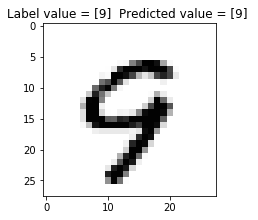

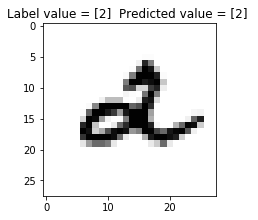

In [37]:
import numpy
for index in numpy.random.choice(len(y_test), 2, replace = False):
    predicted = model.predict(X_test[index:index + 1])[0]
    label = y_test[index]
    result_label = numpy.where(label == numpy.amax(label))
    result_predicted = numpy.where(predicted == numpy.amax(predicted))
    title = "Label value = %s  Predicted value = %s " % (result_label[0], result_predicted[0])
    
    fig = plt.figure(1, figsize = (3,3))
    ax1 = fig.add_axes((0,0,.8,.8))
    ax1.set_title(title)
    images = X_test
    plt.imshow(images[index].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
    plt.show()

## 10. 학습 시각화하기


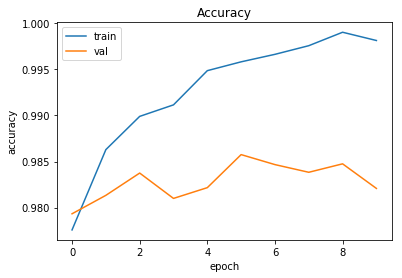

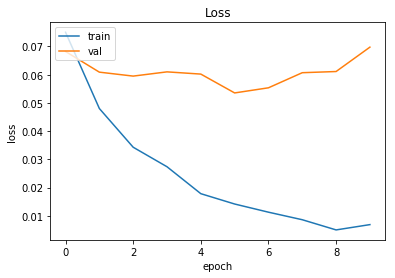

In [38]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'], loc='upper left')
plt.show()